In [5]:
from methods import common
import copy
from methods.common import fitness,mutate
def ts(env,record=False):
    pop,J,M,W,N,A,D,pt,p = env
    fitness_values = [fitness(chromosome, J, M, A, D, N, pt, p, W) for chromosome in pop]
    best_fitness = max(fitness_values)
    current_solution = pop[fitness_values.index(best_fitness)]
    tabu_size=5
    tabu_tenure=5
    max_iter=10000
    # 定义禁忌表
    tabu_list = []
    record_list = []
    # 计算当前解的适应度函数
    current_fitness = -fitness(current_solution, J, M, A, D, N, pt, p, W)
    best_fitness = current_fitness
    # 进入主循环
    for i in range(max_iter):
        # 生成当前解的所有邻居解
        neighbors = []
        for j in range(100):
            neighbor = mutate(copy.deepcopy(current_solution))
            if neighbor not in tabu_list:
                neighbors.append(neighbor)
        if not neighbors: # 如果邻居解为空，则跳出循环
            break
        # 选择一个最优解，且不在禁忌表中
        best_neighbor = None
        best_neighbor_fitness = float('inf')
        for neighbor in neighbors:
            neighbor_fitness = -fitness(neighbor, J, M, A, D, N, pt, p, W)
            if neighbor_fitness < best_neighbor_fitness and neighbor not in tabu_list:
                best_neighbor = neighbor
                best_neighbor_fitness = neighbor_fitness
                if record:
                    print(best_neighbor_fitness)
                    record_list.append(best_neighbor_fitness)
        # 如果没有可行的邻居解，则跳出循环
        if best_neighbor is None:
            break
        # 将最优解加入禁忌表，并更新禁忌表中的所有解的期限
        tabu_list.append(best_neighbor + [tabu_tenure])
        if len(tabu_list) > tabu_size:
            tabu_list.pop(0)
        for k in range(len(tabu_list)):
            tabu_list[k][-1] -= 1
            if tabu_list[k][-1] <= 0:
                tabu_list.pop(k)
                break
        # 如果当前解的适应度函数优于历史最优解，则更新历史最优解
        if best_neighbor_fitness < best_fitness:
            best_solution = copy.deepcopy(best_neighbor)
            best_fitness = best_neighbor_fitness
            print(best_fitness)
        # 更新当前解和对应的适应度函数
        current_solution = copy.deepcopy(best_neighbor)
        current_fitness = best_neighbor_fitness
    if record:
        return record_list
    return  best_fitness

In [6]:
env = common.read_env('../env/case1/0.xlsx')
fitness_value_list = ts(env,True)

33320.679
33260.487
33179.534999999996
33172.962
33023.523
33023.523
33200.397
33165.657
33106.353
32695.430999999997
32612.154
32612.154
33462.156
32484.333
32370.165
32370.165
33158.613
32505.911999999997
32213.981999999996
31710.072
31710.072
33822.890999999996
33020.136
31675.68
31629.969
31430.505
31430.505
33898.386
33398.616
33079.8
31771.256999999998
31674.45
31382.706
31382.706
33555.732
31730.375999999997
31677.285
31637.409
31549.019999999997
31449.546
31440.222
33674.451
31407.429
33300.231
31954.17
31470.609
31459.299
31253.252999999997
31234.136999999995
31234.136999999995
33035.355
31366.239
30967.182
30789.785999999996
30789.785999999996
32471.000999999997
32233.368
31405.314
31364.949
30910.152000000002
30707.954999999998
30707.954999999998
31703.28
31613.034
30815.409
30777.513
30769.68
32811.926999999996
31283.843999999997
31243.617
31179.605999999996
30993.591
30684.542999999998
30684.542999999998
30817.701
30736.725
30652.215
30652.215
31669.854
31124.64
31005.141


In [9]:
min(fitness_value_list)

29664.702

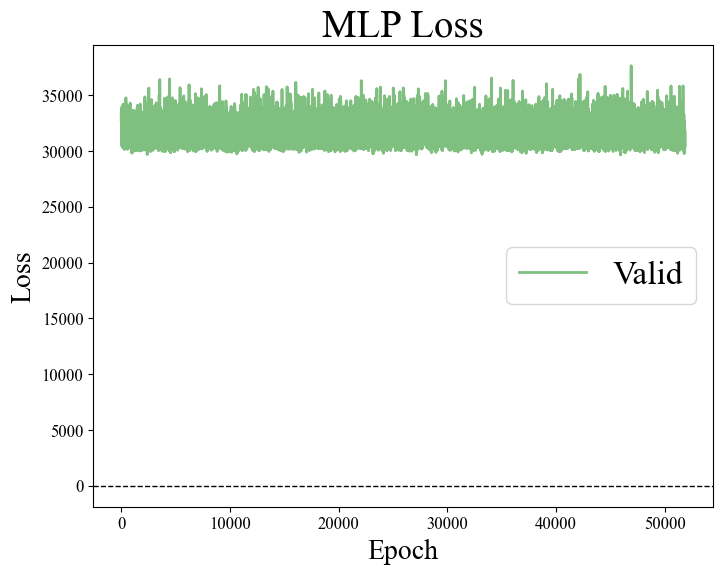

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family='Times New Roman')
# 生成随机数据
x = np.arange(0, len(fitness_value_list))

# 绘图
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, fitness_value_list, alpha=0.5, color='green', linewidth=2, label='Valid')
# 界限线
ax.axhline(y=0, linestyle='--', color='black', linewidth=1)
# 标题和标签
ax.set_title('MLP Loss', fontsize=28)
ax.set_xlabel('Epoch', fontsize=20)
ax.set_ylabel('Loss', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=12)
# 图例
ax.legend(loc='best', fontsize=24)

plt.show()